<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 10**
Joshua Dollison

MAT421-16133

3/30/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# **1: ODE Initial Value Problem Statement**

The class text defines a differential equation as a relationship between a function, its independent variable, and any number of its derivatives. An ordinary differential equation or ODE is a differential equation where the independent variable, and therefore also the derivatives, is in one dimension.

The book goes on to state that for a certain class of ordinary differential equations, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the initial value problem. Although the name suggests we will only cover ODEs that evolve in time, initial value problems can also include systems that evolve in other dimensions such as space. In an initial value problem (IVP), one seeks a particular solution that not only satisfies the ODE $F\bigl(t, y(t), y'(t), \ldots, y^{(n)}(t)\bigr)=0,$ but also meets a set of specified initial conditions at a starting time (e.g., $y(t_0)=y_0,; y'(t_0)=y_0',;\ldots,; y^{(n-1)}(t_0)=y_0^{(n-1)}.$)

Intuitively, the pendulum equation can be solved as an initial value problem because under only the force of gravity, an initial position and velocity should be sufficient to describe the motion of the pendulum for all time afterward.  For small angles the nonlinearity simplifies, illustrating how an IVP can uniquely determine a solution under appropriate conditions.

---

### **Example 1.1**
In this example, we define a simple initial value problem (IVP) given by $y' = -y$ with $y(0)=1.$ We solve the IVP using SciPy's `solve_ivp` function and plot both the numerical and the exact solution.

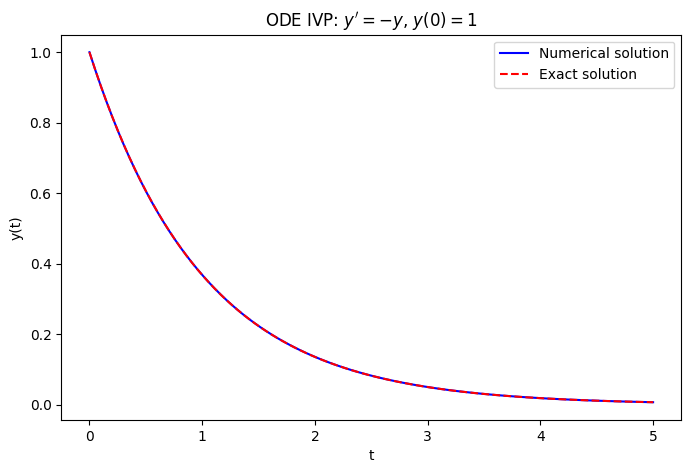

In [2]:
def ode(t, y):
    return -y

t_span = (0, 5)
y0 = [1]

# Create a grid for evaluation
t_eval = np.linspace(0, 5, 100)
sol = solve_ivp(ode, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'b-', label='Numerical solution')
plt.plot(sol.t, np.exp(-sol.t), 'r--', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('ODE IVP: $y\' = -y$, $y(0)=1$')
plt.legend()
plt.show()

### **Example 1.2**

In this GPT inspired real-world example, we model Newton’s Law of Cooling, an IVP where the temperature $T$ changes according to $T' = -k,(T - T_{\text{env}})$ with initial condition $T(0)=100.$ This simulates how an object cools down towards the ambient temperature $T_{\text{env}}=20.$

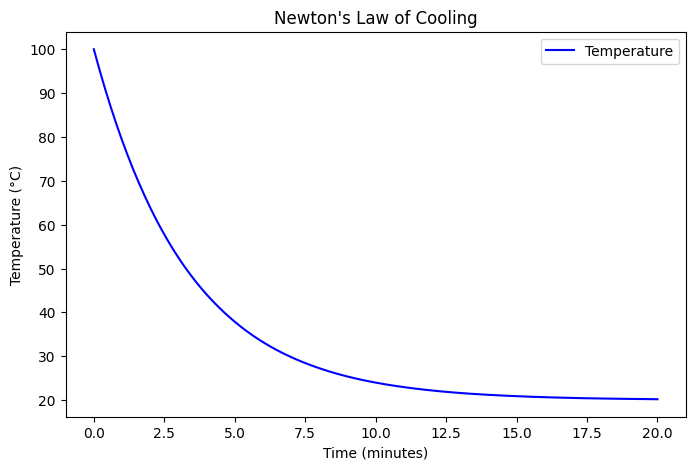

In [3]:
def cooling(t, T):
    k = 0.3
    T_env = 20
    return -k * (T - T_env)

t_span = (0, 20)
T0 = [100]  # initial temperature
t_eval = np.linspace(0, 20, 200)

sol = solve_ivp(cooling, t_span, T0, t_eval=t_eval)

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'b-', label='Temperature')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (°C)')
plt.title('Newton\'s Law of Cooling')
plt.legend()
plt.show()

# **2: Reduction of Order**

The class text states that many numerical methods for solving initial value problems are designed specifically to solve first-order differential equations. To make these solvers useful for solving higher order differential equations, we must often reduce the order of the differential equation to first order. The technique involves introducing a state vector that contains the original function and its derivatives up to order n-1. For instance, a second-order ODE like the simplified pendulum equation can be converted by setting $y_1 = y$ and $y_2 = y',$ which leads to the first-order system:

$$
\begin{aligned}
y_1' &= y_2, \\
y_2' &= g(t, y_1, y_2),
\end{aligned}
$$

where $g$ represents the function derived from the original second-order ODE. This conversion is essential for applying standard numerical methods that require first-order formulations.  In general, the state of a system is a collection of all the dependent variables that are relevant to the behavior of the system.

---

### **Example 2.1**

In many cases, solvers are designed for first-order ODEs. Here, we reduce the second-order ODE $y'' = -y$ (a simple harmonic oscillator) to a system of first-order ODEs by setting $u = y$ and $v = y'$. Thus, $u' = v$ and $v' = -u.$

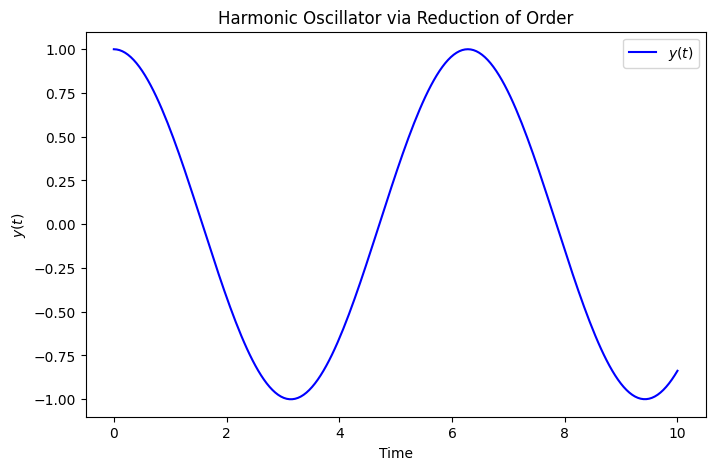

In [4]:
def harmonic_oscillator(t, Y):
    u, v = Y  # where u = y and v = y'
    du_dt = v
    dv_dt = -u
    return [du_dt, dv_dt]

t_span = (0, 10)
Y0 = [1, 0]  # initial conditions: y(0)=1, y'(0)=0
t_eval = np.linspace(0, 10, 200)

sol = solve_ivp(harmonic_oscillator, t_span, Y0, t_eval=t_eval)
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'b-', label='$y(t)$')
plt.xlabel('Time')
plt.ylabel('$y(t)$')
plt.title('Harmonic Oscillator via Reduction of Order')
plt.legend()
plt.show()

### **Example 2.2**

In this GPT inspired real-world example, we consider a mass-spring-damper system modeled by the second-order ODE: $m, y'' + c, y' + k, y = 0.$  We reduce this to a first-order system by letting $u = y$ and $v = y'$, so that $u' = v$ and $v' = \frac{-c,v - k,u}{m}.$  This example simulates the displacement of the system over time.

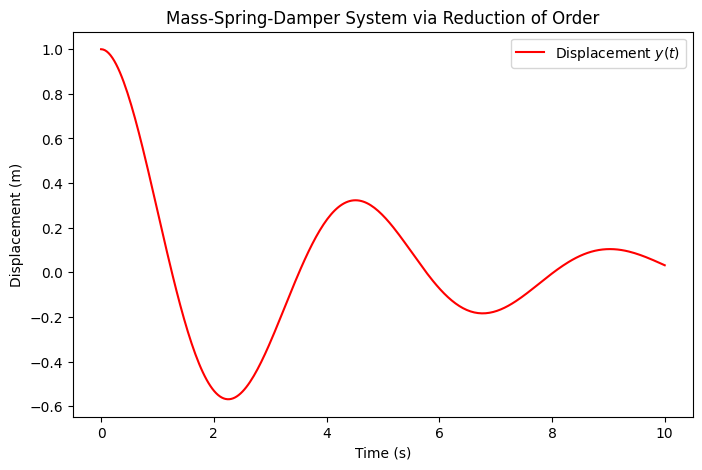

In [5]:
def mass_spring_damper(t, Y):
    m = 1.0   # mass
    c = 0.5   # damping coefficient
    k = 2.0   # spring constant
    u, v = Y  # u = displacement, v = velocity
    du_dt = v
    dv_dt = (-c * v - k * u) / m
    return [du_dt, dv_dt]

t_span = (0, 10)
Y0 = [1, 0]  # initial displacement 1, initial velocity 0
t_eval = np.linspace(0, 10, 300)

sol = solve_ivp(mass_spring_damper, t_span, Y0, t_eval=t_eval)
plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'r-', label='Displacement $y(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Mass-Spring-Damper System via Reduction of Order')
plt.legend()
plt.show()

# **3: The Euler Method**

The Euler method is presented as the simplest numerical scheme to solve first-order ODEs (and by extension, systems obtained via reduction of order). With a given initial condition $s(t_0) = s_0$ and a uniform grid with step size $h$, the method computes the approximate solution iteratively using the formula
$s_{i+1} = s_i + h, f(t_i, s_i),$ where $f(t,s)$ defines the ODE $s'(t)=f(t,s(t)).$ Starting from the known initial value, the method advances step by step, “following” the derivative to build an approximate solution. Although it is not the most accurate method, Euler's method lays the foundation for understanding more sophisticated integration techniques.

---

### **Example 3.1**

In this example, we implement the Explicit Euler Method manually to solve the IVP $y' = -y, y(0)=1.$  The method uses the iterative formula $y_{i+1} = y_i + h,f(t_i,y_i)$ with a step size $h.$. We then compare the numerical solution with the exact solution $y(t)=e^{-t}$

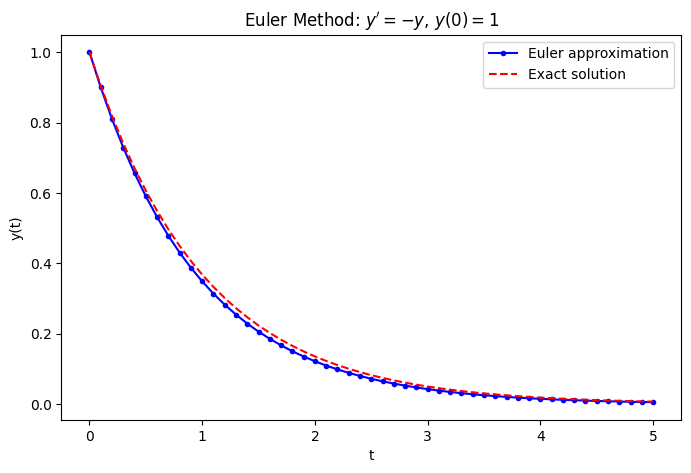

In [6]:
h = 0.1
t = np.arange(0, 5 + h, h)
y = np.zeros(len(t))
y[0] = 1  # initial condition

for i in range(len(t) - 1):
    y[i+1] = y[i] + h * (-y[i])  # Euler update: y_{i+1} = y_i + h*(-y_i)

plt.figure(figsize=(8,5))
plt.plot(t, y, 'b.-', label='Euler approximation')
plt.plot(t, np.exp(-t), 'r--', label='Exact solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Euler Method: $y\'=-y$, $y(0)=1$')
plt.legend()
plt.show()

### **Example 3.2**

In this GPT inspired real-world example, we apply the Explicit Euler Method to the logistic growth model, a common real-world population dynamics problem. The logistic ODE is given by $y' = r, y\left(1 - \frac{y}{K}\right), y(0)=10,$ with $r=0.5$ and $K=100$. We compute the approximate solution and compare it with the exact solution of the logistic equation.

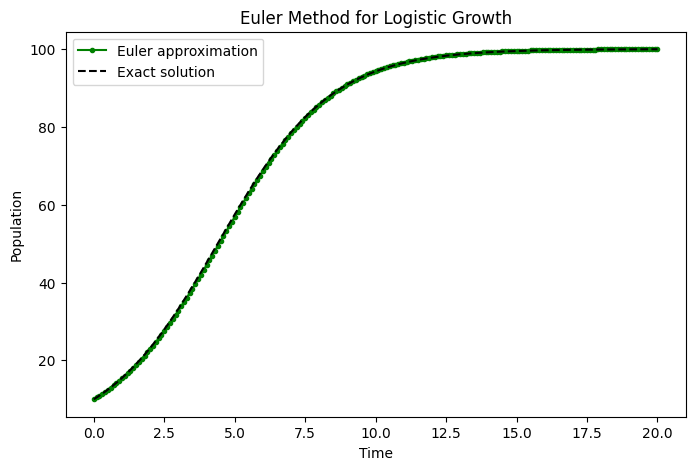

In [7]:
r = 0.5
K = 100

def logistic(y):
    return r * y * (1 - y/K)

h = 0.1
t = np.arange(0, 20 + h, h)
y = np.zeros(len(t))
y[0] = 10  # initial population

for i in range(len(t) - 1):
    y[i+1] = y[i] + h * logistic(y[i])

# Exact solution for the logistic equation:
y_exact = K / (1 + ((K - y[0])/y[0]) * np.exp(-r * t))

plt.figure(figsize=(8,5))
plt.plot(t, y, 'g.-', label='Euler approximation')
plt.plot(t, y_exact, 'k--', label='Exact solution')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Euler Method for Logistic Growth')
plt.legend()
plt.show()